In [1]:
# Importing the required modules
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F 
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

from collections import OrderedDict
import numpy as np

In [2]:
# Applying transformations on images
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

#Loading training and testing set
trainset = datasets.MNIST('MNIST_data/', train=True, download=True, transform=transform)
testset = datasets.MNIST('MNIST_data/', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
# Defining model
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(784, 128)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(128, 64)),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(64, 10)),
    ('log_soft1', nn.LogSoftmax(dim=1))
]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (log_soft1): LogSoftmax()
)

In [4]:
# setting the criterion as Negative Log Likelihood Loss
criterion = nn.NLLLoss()
# setting the optimizer to Stocastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [5]:
epochs = 5
running_loss = 0
steps = 0
print_every = 50

for e in range(epochs):
    
    for images, labels in trainloader:
        steps += 1
        
        # This step will change the shape of images from (64,1,28,28) to (64, 784)
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        # feed-forward
        logits = model(images)
        
        #calculating the loss
        loss = criterion(logits, labels)
        
        # Doing backward propagation of loss
        loss.backward()
        
        # Updating the weights
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps%print_every==0:
            print('Epochs {}/{}: '.format(e+1, epochs), ' Trainin error: {:.4f}'.format(running_loss/print_every))
            running_loss=0

Epochs 1/5:   Trainin error: 2.2920
Epochs 1/5:   Trainin error: 2.2641
Epochs 1/5:   Trainin error: 2.2394
Epochs 1/5:   Trainin error: 2.2084
Epochs 1/5:   Trainin error: 2.1758
Epochs 1/5:   Trainin error: 2.1424
Epochs 1/5:   Trainin error: 2.1099
Epochs 1/5:   Trainin error: 2.0642
Epochs 1/5:   Trainin error: 2.0073
Epochs 1/5:   Trainin error: 1.9658
Epochs 1/5:   Trainin error: 1.8936
Epochs 1/5:   Trainin error: 1.8328
Epochs 1/5:   Trainin error: 1.7710
Epochs 1/5:   Trainin error: 1.6817
Epochs 1/5:   Trainin error: 1.6101
Epochs 1/5:   Trainin error: 1.5316
Epochs 1/5:   Trainin error: 1.4465
Epochs 1/5:   Trainin error: 1.3615
Epochs 2/5:   Trainin error: 1.2885
Epochs 2/5:   Trainin error: 1.2046
Epochs 2/5:   Trainin error: 1.1609
Epochs 2/5:   Trainin error: 1.0896
Epochs 2/5:   Trainin error: 1.0371
Epochs 2/5:   Trainin error: 0.9638
Epochs 2/5:   Trainin error: 0.9268
Epochs 2/5:   Trainin error: 0.8600
Epochs 2/5:   Trainin error: 0.8391
Epochs 2/5:   Trainin error:

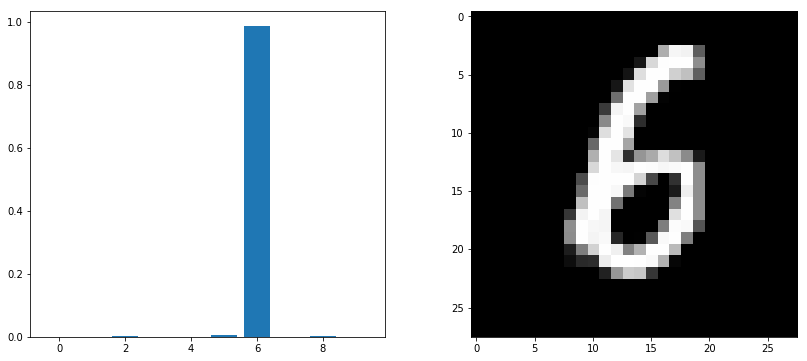

In [7]:
images, labels = next(iter(testloader))

# changing the shape of images[0] from (1,28,28) to (1,784)
img = images[0].view(1,-1)

# Defined a figure of size(14,6)
plt.figure(figsize=[14,6])

# forward passing the 'img'
logits = model(img)
# using torch.exp() gives out model gives outputs as los_softmax and doing exp() we will get original values.
output = torch.exp(logits)

# converts 'output' tensor to numpy array
y = output.detach().numpy()
N = y.shape[1]
x = np.arange(N)

# Sub plot 1st of plots with 1 row and 2 columns
plt.subplot(1,2,1)
plt.bar(x,y.ravel())


# Sub plot 2nd of plots with 1 row and 2 columns
plt.subplot(1,2,2)
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')